In [5]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from mmseg.apis import init_model, inference_model, show_result_pyplot

In [6]:
config_file = 'configs/pspnet.py'
checkpoint_file = 'work_dirs/deeplabv3plus/iter_8000.pth'

test_img_path = 'dataset/Preprocessed_2DSS/images/test'
all_files = os.listdir(test_img_path)

model = init_model(config_file, checkpoint_file, device='cuda:0')

Loads checkpoint by local backend from path: work_dirs/deeplabv3plus/iter_8000.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.bottleneck.conv.weight: copying a param with shape torch.Size([512, 2560, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 4096, 3, 3]).
unexpected key in source state_dict: decode_head.image_pool.1.conv.weight, decode_head.image_pool.1.bn.weight, decode_head.image_pool.1.bn.bias, decode_head.image_pool.1.bn.running_mean, decode_head.image_pool.1.bn.running_var, decode_head.image_pool.1.bn.num_batches_tracked, decode_head.aspp_modules.0.conv.weight, decode_head.aspp_modules.0.bn.weight, decode_head.aspp_modules.0.bn.bias, decode_head.aspp_modules.0.bn.running_mean, decode_head.aspp_modules.0.bn.running_var, decode_head.aspp_modules.0.bn.num_batches_tracked, decode_head.aspp_modules.1.depthwise_conv.conv.weight, decode_head.aspp_modules.1.depthwise_conv.bn.weight, decode_head.aspp_modules.1.depthwise_

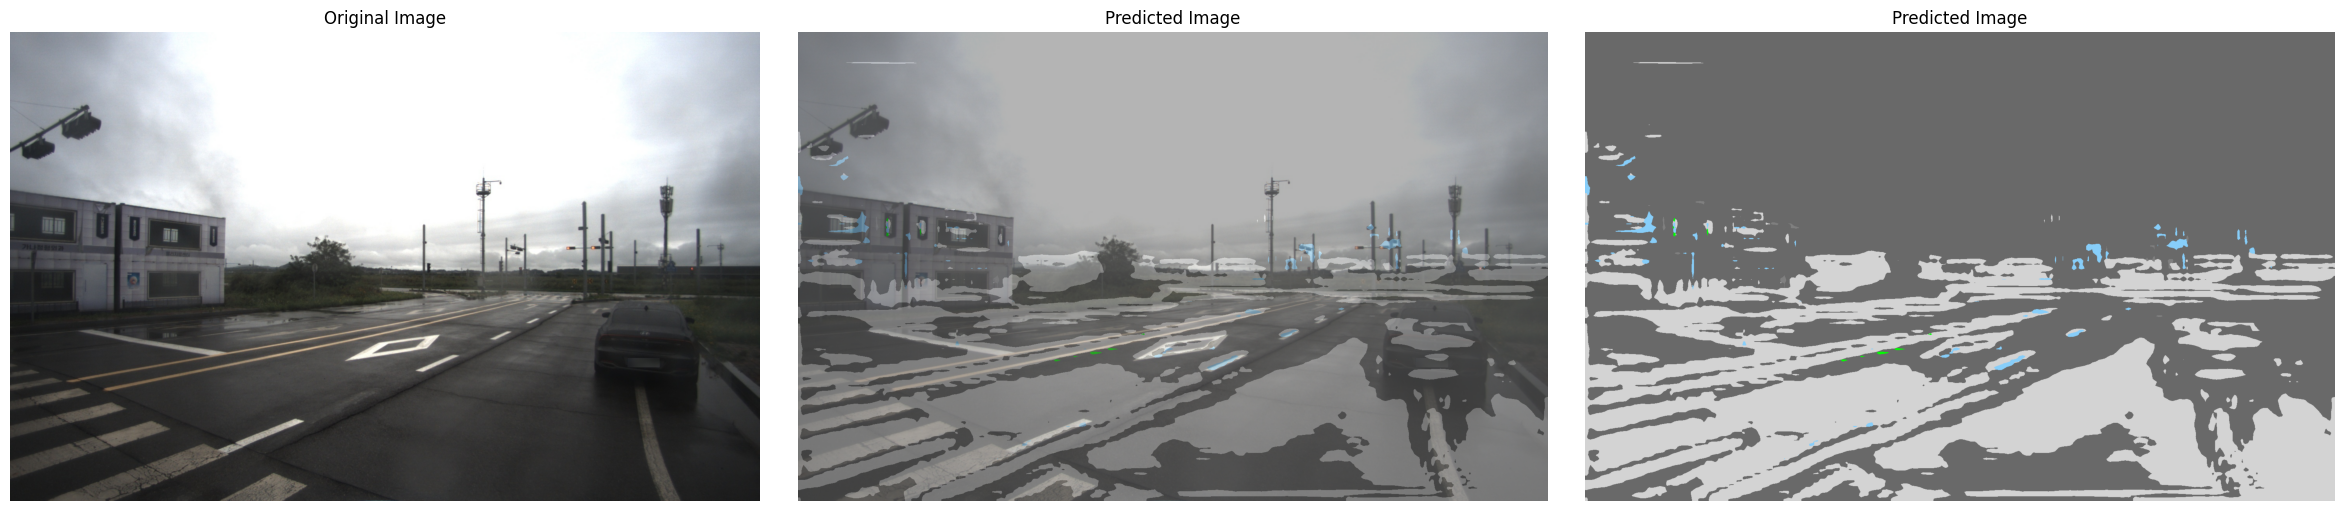

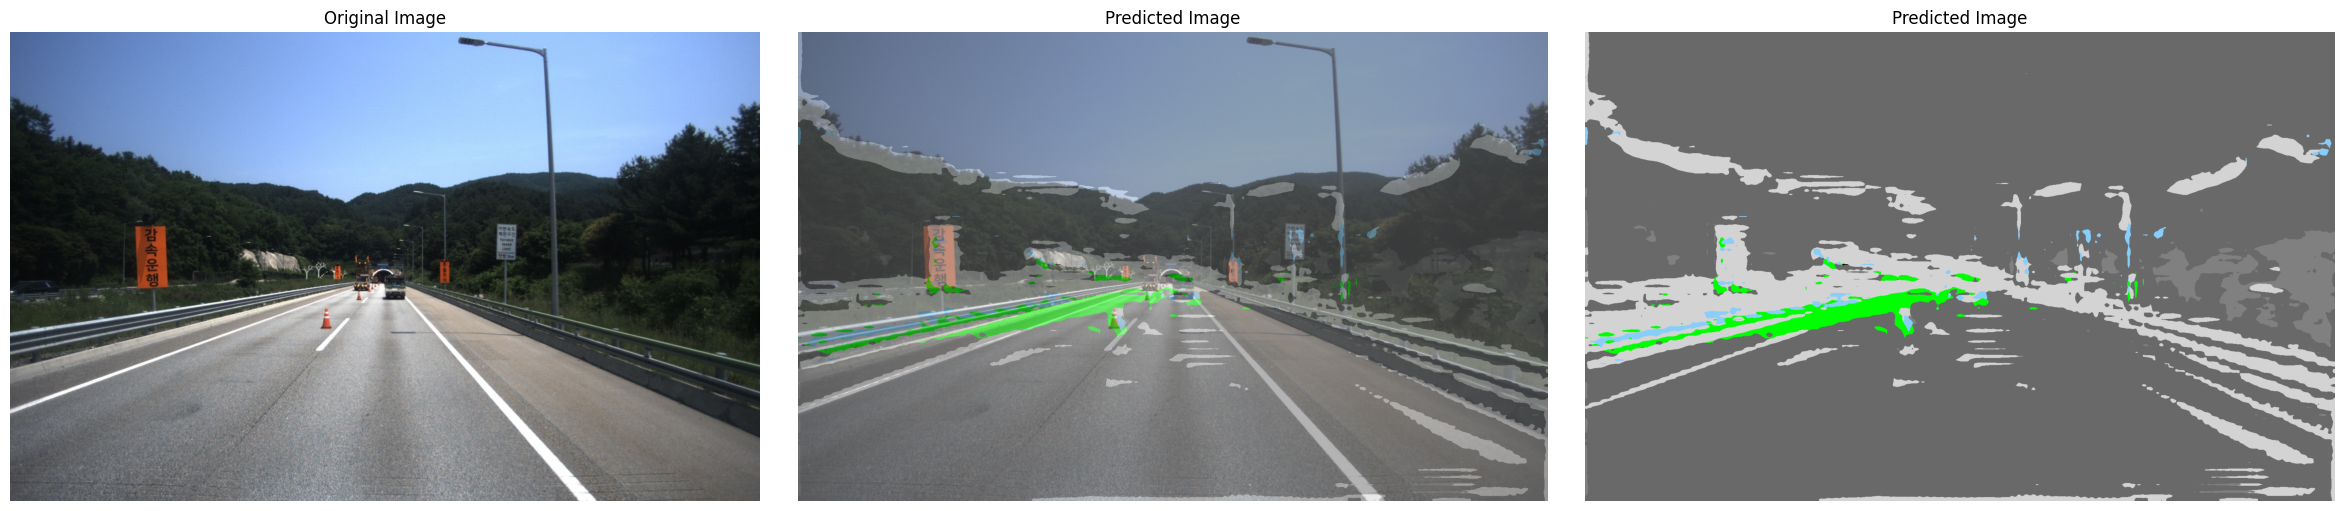

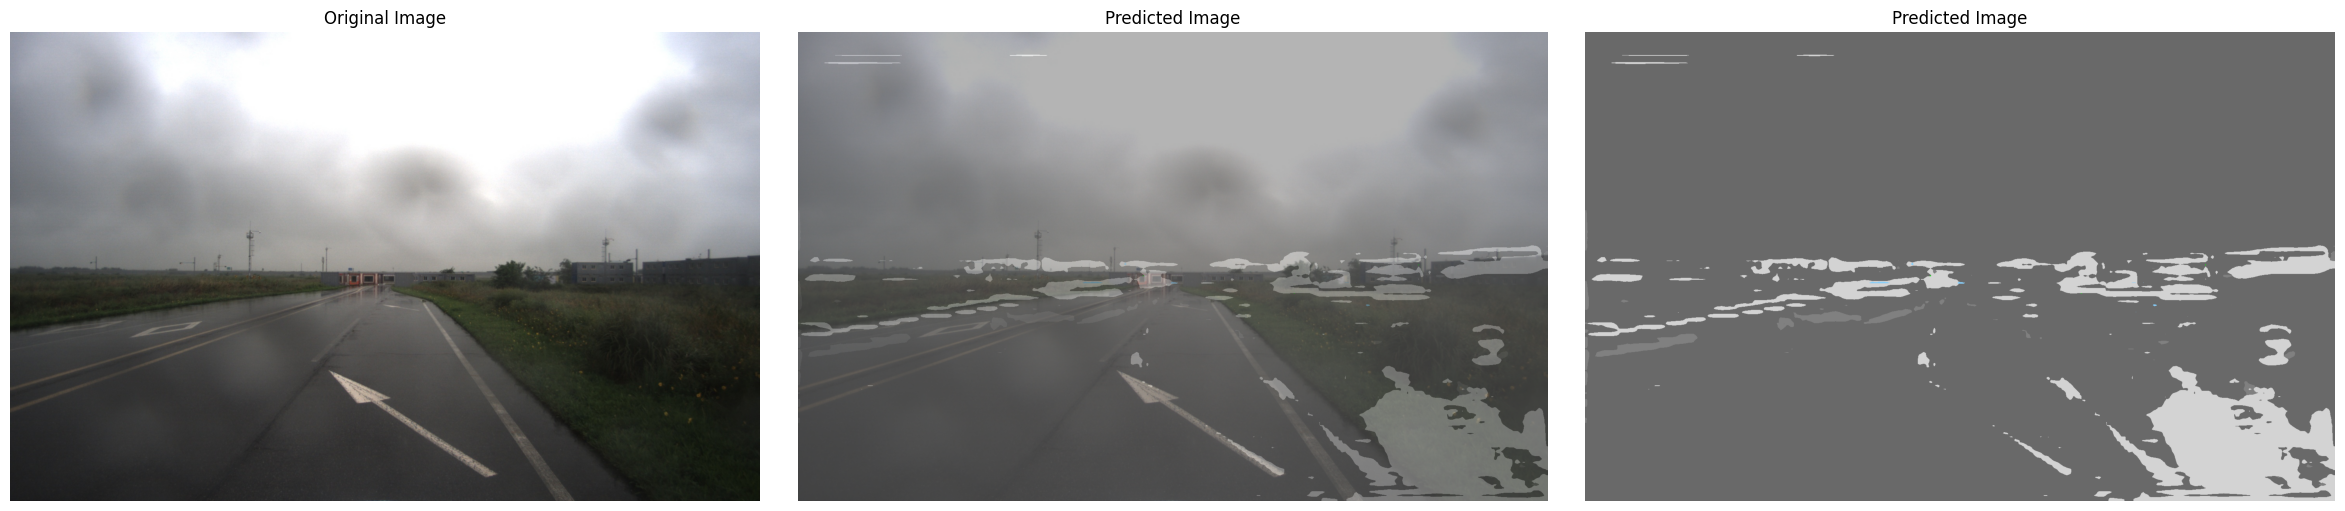

In [7]:
random_files = random.sample(all_files, 3)
random_files_paths = [os.path.join(test_img_path, file) for file in random_files]

for img_path in random_files_paths:
    original_img = Image.open(img_path)
    result = inference_model(model, img_path)

    vis_image = show_result_pyplot(model, img_path, result, show=False)
    mask_image = show_result_pyplot(model, img_path, result, show=False, opacity=1)

    plt.figure(figsize=(30,10))
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(vis_image)
    plt.title('Predicted Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(mask_image)
    plt.title('Predicted Image')
    plt.axis('off')
    
    plt.subplots_adjust(wspace=0.05, hspace=0)
    plt.show()